# Uber Analysis #

**To:** Operations & Strategy Stakeholders (Uber Rides Division)

**From:** Jean Fernandes (Data Analytics Team)

**Subject:** Analysis of Ride Data for Operational Insights - Draft



## Executive Summary

We analyzed the dataset...

## Loading the data

In [22]:
#loading the data
import pandas as pd

df = pd.read_csv("data/ncr_ride_bookings.csv")

# print(df.shape)
df.head()
# df.info()
# df.isnull().sum()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


### 1. Ride Duration & Revenue Distributions  


- Provide summary statistics (**mean, median, variance, percentiles**).  
- Identify whether durations and revenues follow any known **continuous probability distributions**. 

Since we are working with trip duration and revenue, I will be using the following columns: Avg CTAT (Customer Trip Arrival Time) for trip duration, and Booking value for revenue. After a preliminary analysis of the data, we concluded that the dataset represents panel data as every row is a booking event with different attributes (time, ID, status).

In [23]:
# First we will filter only completed rides
df_completed = df[(df['Booking Status'] == "Completed") &
                   (df['Booking Value'].notnull()) &
                    (df['Avg CTAT'].notnull())]



In [24]:
# Separating the two columns that we need
df_analysis = df_completed[['Booking Value', 'Avg CTAT']].copy()

#changing the name for clarity
df_analysis.rename(columns={
    'Avg CTAT': 'Ride_Duration',
    'Booking Value': 'Revenue' }, inplace=True)

df_analysis.head()


,Revenue,Ride_Duration
2,627.0,25.8
3,416.0,28.5
4,737.0,19.6
5,316.0,18.1
6,640.0,20.4


In [36]:
# Enhanced version
styled_combined = pd.DataFrame({
    'Mean': df_analysis.mean().round(0).astype(int),
    'Median': df_analysis.median().round(0).astype(int),
    'Std Dev': df_analysis.std().round(0).astype(int),
    'Variance': df_analysis.var().round(0).astype(int)
}).style\
    .set_properties(**{'text-align': 'center'})\
    .background_gradient(
        subset=['Mean', 'Median'], cmap="Blues")\
    .background_gradient(
        subset=['Std Dev', 'Variance'], cmap="Greens")\
    .format({
        'Revenue': '${:.2f}',
        'Ride_Duration': '{:.2f} min'
    })\
    .set_caption("Ride Statistics Summary")\
    .set_table_styles([
        {'selector': 'caption', 'props': [
            ('caption-side', 'top'),
            ('font-size', '16px'),
            ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [
            ('background-color', '#f0f0f0'),
            ('padding', '8px')]},
        {'selector': 'td', 'props': [
            ('padding', '8px'),
            ('border', '1px solid #ddd')]},
        {'selector': 'tr:hover', 'props': [
            ('background-color', '#f5f5f5')]}
    ])

display(styled_combined)

,Mean,Median,Std Dev,Variance
Revenue,508,414,396,156863
Ride_Duration,30,30,9,75


## Business Insight:


**1. Central Tendency:**
<br>
    - Revenue: mean (508.17) is higher than the median (414.00), indicating right-skewed distribution. 
    <br>
    - Ride Duration: mean (30.03) is almost equal to median (30.00), indicating symmetry. <br>
    <br>

**2.Dispersion:**<br>
    - Revenue: high variance (156,863.00) and standard deviation (396) showing wide spread.
    <br>
    - Ride Duration: variance (74.83) and standard deviation (8.65) showing consistent trip times.
<br>

### Percentiles

,25th Percentile,50th Percentile (Median),75th Percentile,90th Percentile,95th Percentile
Revenue,234,414,689,958,1222
Ride_Duration,23,30,38,42,44


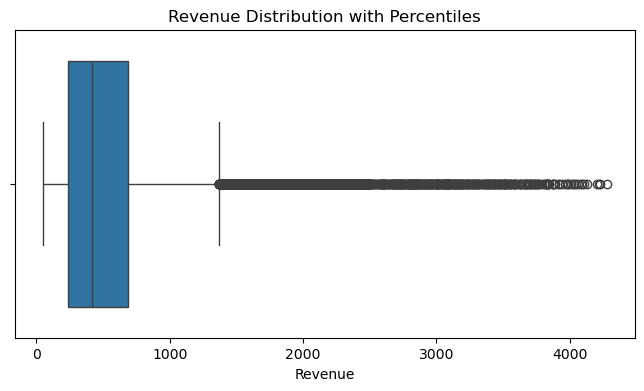

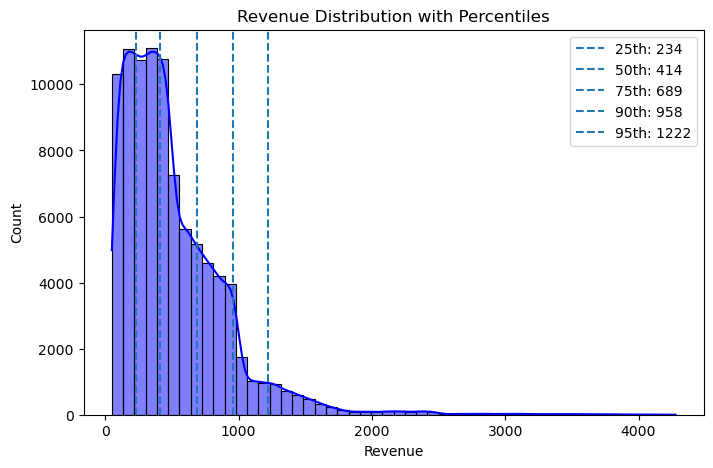

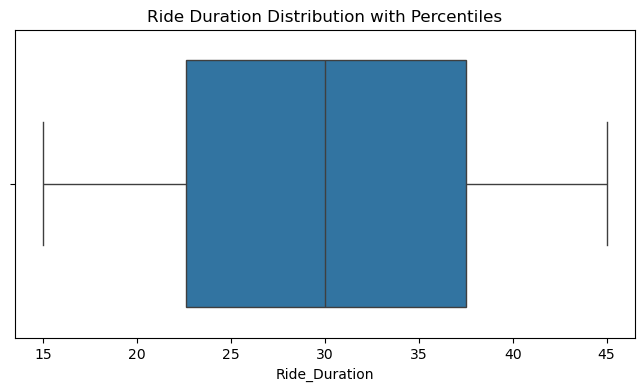

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Percentile summary with style
percentile = pd.DataFrame({
    '25th Percentile': df_analysis.quantile(0.25).round(0).astype(int),
    '50th Percentile (Median)': df_analysis.quantile(0.50).round(0).astype(int),
    '75th Percentile': df_analysis.quantile(0.75).round(0).astype(int),
    '90th Percentile': df_analysis.quantile(0.90).round(0).astype(int),
    '95th Percentile': df_analysis.quantile(0.95).round(0).astype(int)
}).style\
    .set_properties(**{'text-align': 'center'})\
    .background_gradient(
        subset=['25th Percentile', '75th Percentile', '95th Percentile'], cmap="Blues")\
    .background_gradient(
        subset=['50th Percentile (Median)', '90th Percentile'], cmap="Greens")\
    .format({
        'Revenue': '${:.2f}',
        'Ride_Duration': '{:.2f} min'
    })\
    .set_caption("Percentile Summary")\
    .set_table_styles([
        {'selector': 'caption', 'props': [
            ('caption-side', 'top'),
            ('font-size', '16px'),
            ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [
            ('background-color', '#f0f0f0'),
            ('padding', '8px')]},
        {'selector': 'td', 'props': [
            ('padding', '8px'),
            ('border', '1px solid #ddd')]},
        {'selector': 'tr:hover', 'props': [
            ('background-color', '#f5f5f5')]}
    ])


display(percentile)

#revenue boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df_analysis['Revenue'])
plt.title("Revenue Distribution with Percentiles")
plt.show()

#revenue histplot
plt.figure(figsize=(8,5))
sns.histplot(df_analysis['Revenue'], bins=50, kde=True, color="blue")

for p in [25, 50, 75, 90, 95]:
    value = np.percentile(df_analysis['Revenue'], p)
    plt.axvline(value, linestyle='--', label=f'{p}th: {value:.0f}')

plt.legend()
plt.title("Revenue Distribution with Percentiles")
plt.show()

#Ride Duration boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df_analysis['Ride_Duration'])
plt.title("Ride Duration Distribution with Percentiles")
plt.show()


### Business Insight:

**Percentile Analysis:**
   - Revenue Distribution:
     * 25th percentile: Lower quarter of trips generate less than [value]
     * 50th percentile (median): Half of trips earn below 414 units
     * 75th percentile: Upper quarter of trips exceed [value]
     * 90th/95th percentiles show high-value outliers reaching into thousands


